In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# define image and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

data agumentation
split
1.rotation
2.flips
3.zoom
4.rescale:orginal pixel values(typically between 0 and 255) are divided by 255,effectively bringing them within the 0-1 range

In [10]:
# creating training data parameters!
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

#creating training data with the above parameters and applying transformation
# folder = parameters.flow_from_directory(path,ts,bs,cm,subset)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Data',
    target_size = (img_size,img_size),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'training'
)

Found 241 images belonging to 2 classes.


In [11]:
# creating validation data
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Data',
    target_size = (img_size,img_size),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    subset = 'validation'
)

Found 60 images belonging to 2 classes.


In [13]:
# define model
model = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_generator,epochs = 5, validation_data = val_generator, batch_size = BATCH_SIZE,)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.7275 - loss: 0.6310 - val_accuracy: 0.7500 - val_loss: 0.5651
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.7988 - loss: 0.4783 - val_accuracy: 0.7000 - val_loss: 0.5372
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.8631 - loss: 0.3042 - val_accuracy: 0.6833 - val_loss: 0.6995
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.9243 - loss: 0.2050 - val_accuracy: 0.7500 - val_loss: 0.6628
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.9877 - loss: 0.0904 - val_accuracy: 0.7500 - val_loss: 0.8771


In [37]:
model.save('/content/drive/MyDrive/Brain_Tumor_Detection/BrainTumor.h5')

In [39]:
# load your model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/Brain_Tumor_Detection/BrainTumor.h5')
print('model loaded')

model loaded


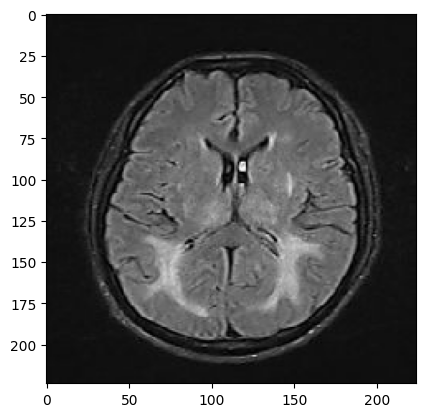

In [52]:
# load and view the test image
test_image_path = "/content/N1436.jpg"
img = image.load_img(test_image_path,target_size = (224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [53]:
# preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis = 0)
img_array /= 255.

In [54]:
# make predictions
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[2.8233968e-05]]


In [55]:
if prediction >= 0.5:
  print("you have brain tumor")
else:
  print("you do not have brain tumor")

you do not have brain tumor


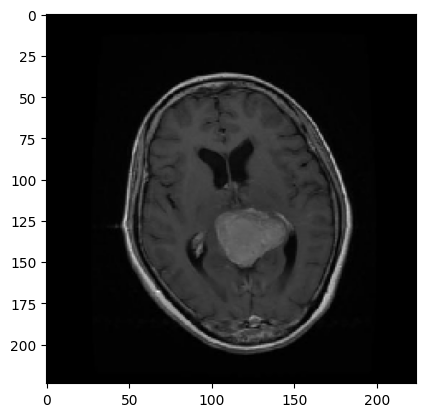

In [56]:
test_image_path = "/content/Y1719.jpg"
img = image.load_img(test_image_path,target_size = (224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [57]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis = 0)
img_array /= 255.

In [58]:
prediction = model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.9965323]]


In [59]:
if prediction >= 0.5:
  print("you have brain tumor")
else:
  print("you do not have brain tumor")

you have brain tumor
